#Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing dataset

In [4]:
df=pd.read_csv('Facebook_Marketplace_data.csv')

# Correlation between various metrics

In [5]:
corr=df.iloc[:,3:12].corr(method='pearson')
corr

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000


**From the above matrix, we can conclude that, all the correlations are in the positive direction and their strength can be observed as:**

**The correlations having value closer to 1 are considered as strong, whereas the correlations having value closer to 0 are considered as weak.**

**For example:**

*   Correlation between num_comments and num_reactions has value 0.150843	which is close to 0, and thus it's weak.
*   Correlation between num_likes and num_reactions has value 0.994923		which is close to 1, and thus it's strong.



# Training a K-means Clustering Model

**Firstly, we need to determine the value of K. Let's first take a random value to make a model(P.S. We will calculate the optimum value later and use it).

In [6]:
X=df.iloc[:,3:12].values
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Elbow Method for calculating Optimum number of Clusters

In [7]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss+=[kmeans.inertia_]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

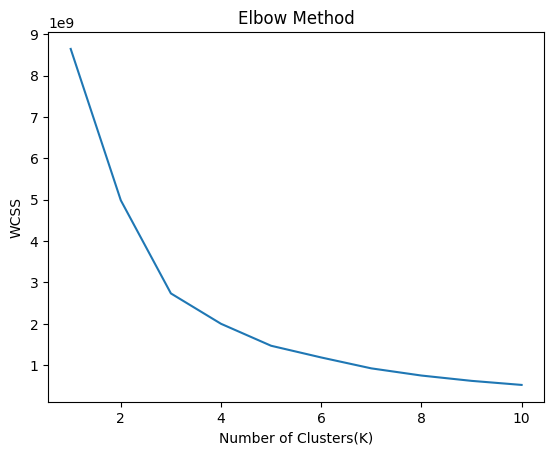

In [8]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters(K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

** As we can observe from the plot, that After K=5, the WCSS decreases slowly. Thus, K=5 is the Optimum value for K. **

# Training the model with K=5

In [9]:
X=df.iloc[:,3:12].values
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Count of Each Cluster

In [10]:
print("Count of Elements in Cluster 1:",list(y_kmeans).count(0))
print("Count of Elements in Cluster 2:",list(y_kmeans).count(1))
print("Count of Elements in Cluster 3:",list(y_kmeans).count(2))
print("Count of Elements in Cluster 4:",list(y_kmeans).count(3))
print("Count of Elements in Cluster 5:",list(y_kmeans).count(4))

Count of Elements in Cluster 1: 410
Count of Elements in Cluster 2: 6111
Count of Elements in Cluster 3: 105
Count of Elements in Cluster 4: 413
Count of Elements in Cluster 5: 11


# Average values of metrics in each Cluster

In [13]:
print("Cluster 1:")
print("Average Value of num_reaction:",np.mean(X[y_kmeans==0,0]))
print("Average Value of num_comments:",np.mean(X[y_kmeans==0,1]))
print("Average Value of num_shares:",np.mean(X[y_kmeans==0,2]))
print("\nCluster 2:")
print("Average Value of num_reaction:",np.mean(X[y_kmeans==1,0]))
print("Average Value of num_comments:",np.mean(X[y_kmeans==1,1]))
print("Average Value of num_shares:",np.mean(X[y_kmeans==1,2]))
print("\nCluster 3:")
print("Average Value of num_reaction:",np.mean(X[y_kmeans==2,0]))
print("Average Value of num_comments:",np.mean(X[y_kmeans==2,1]))
print("Average Value of num_shares:",np.mean(X[y_kmeans==2,2]))
print("\nCluster 4:")
print("Average Value of num_reaction:",np.mean(X[y_kmeans==3,0]))
print("Average Value of num_comments:",np.mean(X[y_kmeans==3,1]))
print("Average Value of num_shares:",np.mean(X[y_kmeans==3,2]))
print("\nCluster 5:")
print("Average Value of num_reaction:",np.mean(X[y_kmeans==4,0]))
print("Average Value of num_comments:",np.mean(X[y_kmeans==4,1]))
print("Average Value of num_shares:",np.mean(X[y_kmeans==4,2]))

Cluster 1:
Average Value of num_reaction: 1777.7073170731708
Average Value of num_comments: 114.21463414634147
Average Value of num_shares: 34.96829268292683

Cluster 2:
Average Value of num_reaction: 105.15987563410243
Average Value of num_comments: 44.72312223858616
Average Value of num_shares: 12.956635575192276

Cluster 3:
Average Value of num_reaction: 498.93333333333334
Average Value of num_comments: 5004.961904761904
Average Value of num_shares: 463.85714285714283

Cluster 4:
Average Value of num_reaction: 465.2857142857143
Average Value of num_comments: 1443.2445520581114
Average Value of num_shares: 323.4648910411622

Cluster 5:
Average Value of num_reaction: 571.1818181818181
Average Value of num_comments: 12727.09090909091
Average Value of num_shares: 577.0909090909091
